# **Simulação de Vetores RSSI com 10 APs em Área 20m x 20m**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# Parâmetros do ambiente
area_size = 20  # metros (20x20 = 400 m²)
grid_step = 1   # distância entre pontos (1 metro)
n_aps = 10      # número de Access Points
n_measurements = 100  # medições por ponto
frequency = 2.4e9     # Hz
pt = 20              # potência de transmissão (dBm)
pl0 = 40             # perda no ponto referência (dB)
mu = 3.5             # expoente de perda (típico para indoor)
sigma = 2            # desvio padrão do ruído (shadowing)
d0 = 1               # distância referência (m)

# Gerar posições fixas dos APs aleatoriamente
np.random.seed(42)
ap_positions = np.random.uniform(0, area_size, size=(n_aps, 2))

# Grelha de pontos no ambiente
x_coords = np.arange(1, area_size, grid_step)
y_coords = np.arange(1, area_size, grid_step)
positions = np.array([(x, y) for x in x_coords for y in y_coords])

# Função para calcular RSSI para um ponto
def simulate_rssi(point):
    rssi_values = []
    for ap in ap_positions:
        d = np.linalg.norm(point - ap)
        d = max(d, d0)  # evita log(0)
        path_loss = pl0 + 20 * np.log10(frequency) + 10 * mu * np.log10(d / d0)
        noise = np.random.normal(0, sigma)
        rssi = pt - path_loss + noise
        rssi = max(rssi, -110)  # truncar mínimo
        rssi_values.append(rssi)
    return rssi_values

# Gerar medições para cada ponto
simulated_data = []
for pos in positions:
    for _ in range(n_measurements):
        rssi_vector = simulate_rssi(pos)
        simulated_data.append(rssi_vector + [pos[0], pos[1]])  # append X, Y


In [31]:

# DataFrame final
columns = [f'WAP{str(i+1).zfill(3)}' for i in range(n_aps)] + ['X', 'Y']
df_simulated = pd.DataFrame(simulated_data, columns=columns)

# Salvar CSV
path_save1 = '/home/darkcover/Documentos/Gan/Outputs/simulated_rssi.csv'
df_simulated.to_csv(path_save1, index=False)
print(f"Simulação concluída! Dados salvos em 'data/simulated_rssi.csv'. Total: {len(df_simulated)} entradas.")

Simulação concluída! Dados salvos em 'data/simulated_rssi.csv'. Total: 44100 entradas.


## O que esse código faz:

* Gera **RSSI realistas** com ruído para uma área de 20×20 m² com 1 metro de resolução.
* Cada ponto tem **10 medições independentes**.
* Calcula a perda de percurso com ruído (shadowing) conforme descrito no artigo.
* Salva os dados prontos para treino no formato:

  ```
  WAP001, ..., WAP010, X, Y
  ```

---


## Se quiser visualizar:

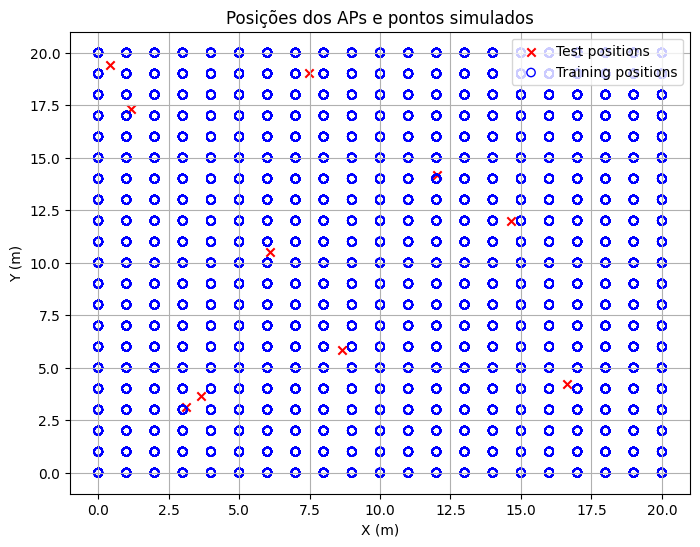

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(ap_positions[:, 0], ap_positions[:, 1], marker='x', color='red', label='Test positions')
plt.scatter(df_simulated['X'], df_simulated['Y'], marker='o', facecolors='none',
            edgecolors='blue', label='Training positions')
plt.legend()
plt.title("Posições dos APs e pontos simulados")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.grid(True)
plt.show()

---

Atualização e finalização da fase 1

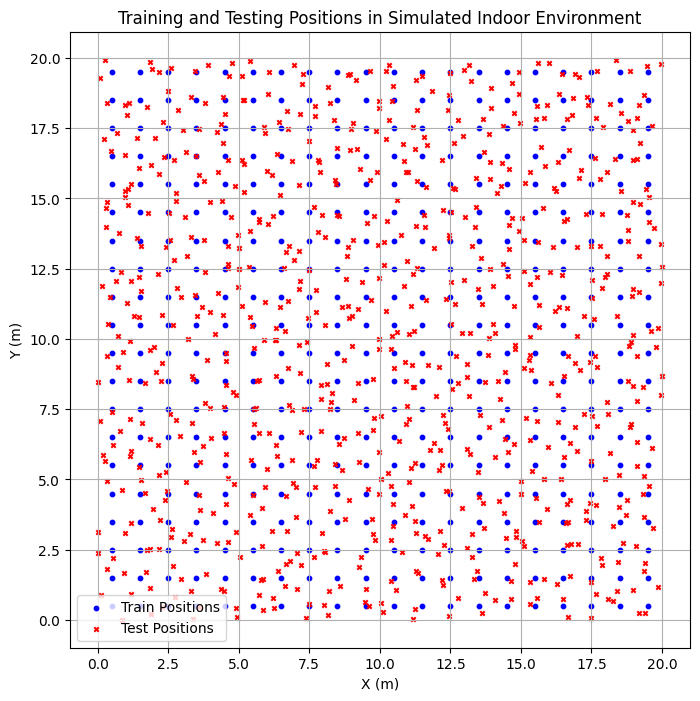

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Área do ambiente
area_size = 20
grid_step = 1

# Posições de treinamento (1 por zona, no centro)
train_x, train_y = np.meshgrid(np.arange(0.5, area_size, grid_step),
                               np.arange(0.5, area_size, grid_step))
train_positions = np.column_stack((train_x.ravel(), train_y.ravel()))

# Posições de teste (2 aleatórias por zona de 1m²)
test_positions = []
for i in range(area_size):
    for j in range(area_size):
        for _ in range(2):  # 2 posições por zona
            x = i + np.random.rand()
            y = j + np.random.rand()
            test_positions.append((x, y))
test_positions = np.array(test_positions)

# Plot
plt.figure(figsize=(8, 8))
plt.scatter(train_positions[:, 0], train_positions[:, 1], c='blue', marker = 'o', label='Train Positions', s=10)
plt.scatter(test_positions[:, 0], test_positions[:, 1], c='red', marker='x', label='Test Positions', s=10)
plt.title("Training and Testing Positions in Simulated Indoor Environment")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_training_test_positions(area_size=20, grid_step=1, seed=42):
    """
    Gera e plota as posições de treinamento (centro de cada zona 1m²)
    e as posições de teste (duas aleatórias por zona), conforme Figura 3 do artigo.
    """
    np.random.seed(seed)

    # Geração de posições de treinamento (centro de cada célula)
    x_train = np.arange(0.5, area_size, grid_step)
    y_train = np.arange(0.5, area_size, grid_step)
    train_x, train_y = np.meshgrid(x_train, y_train)
    train_positions = np.column_stack((train_x.ravel(), train_y.ravel()))

    # Geração de posições de teste (2 aleatórias por zona de 1m²)
    test_positions = []
    for i in range(area_size):
        for j in range(area_size):
            for _ in range(2):
                x = i + np.random.rand()
                y = j + np.random.rand()
                test_positions.append((x, y))
    test_positions = np.array(test_positions)

    # Plot do gráfico
    plt.figure(figsize=(8, 8))
    plt.scatter(train_positions[:, 0], train_positions[:, 1],
                c='blue', label='Train Positions', s=10)
    plt.scatter(test_positions[:, 0], test_positions[:, 1],
                c='orange', marker='x', label='Test Positions', s=10)
    plt.title("Training and Testing Positions in Simulated Indoor Environment")
    plt.xlabel("X (m)")
    plt.ylabel("Y (m)")
    plt.grid(True)
    plt.legend()
    plt.axis("equal")
    plt.show()

    return train_positions, test_positions


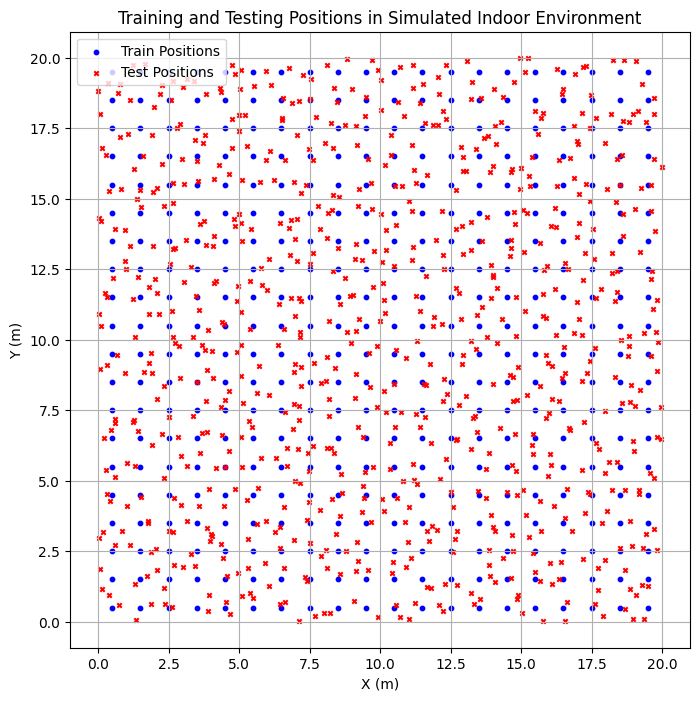

(array([[ 0.5,  0.5],
        [ 1.5,  0.5],
        [ 2.5,  0.5],
        [ 3.5,  0.5],
        [ 4.5,  0.5],
        [ 5.5,  0.5],
        [ 6.5,  0.5],
        [ 7.5,  0.5],
        [ 8.5,  0.5],
        [ 9.5,  0.5],
        [10.5,  0.5],
        [11.5,  0.5],
        [12.5,  0.5],
        [13.5,  0.5],
        [14.5,  0.5],
        [15.5,  0.5],
        [16.5,  0.5],
        [17.5,  0.5],
        [18.5,  0.5],
        [19.5,  0.5],
        [ 0.5,  1.5],
        [ 1.5,  1.5],
        [ 2.5,  1.5],
        [ 3.5,  1.5],
        [ 4.5,  1.5],
        [ 5.5,  1.5],
        [ 6.5,  1.5],
        [ 7.5,  1.5],
        [ 8.5,  1.5],
        [ 9.5,  1.5],
        [10.5,  1.5],
        [11.5,  1.5],
        [12.5,  1.5],
        [13.5,  1.5],
        [14.5,  1.5],
        [15.5,  1.5],
        [16.5,  1.5],
        [17.5,  1.5],
        [18.5,  1.5],
        [19.5,  1.5],
        [ 0.5,  2.5],
        [ 1.5,  2.5],
        [ 2.5,  2.5],
        [ 3.5,  2.5],
        [ 4.5,  2.5],
        [ 

In [46]:
plot_training_test_positions()